In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
X = [0.05, 0.1, 0.2, 0.5, 1, 2]
Archs = ['Rand', 'Mag', 'SNIP', 'GraSP', 'SynFlow']
Colors = {
    'Rand': 'r',
    'Mag': 'b',
    'SNIP': 'g',
    'GraSP': 'y',
    'SynFlow': 'purple'
}

Accuracies = {
    'Rand': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5],
    'Mag': [random.random() for i in range(6)],
    'SNIP': [random.random() for i in range(6)],
    'GraSP': [random.random() for i in range(6)],
    'SynFlow': [random.random() for i in range(6)]
}

InferenceTimes = {}
FLOPS = {}

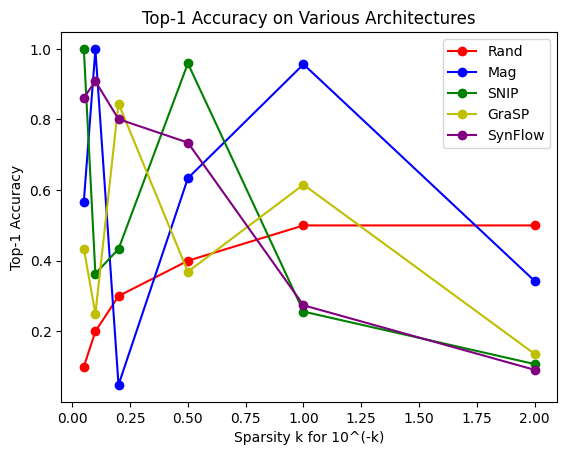

In [14]:
for arch in Archs:
    plt.plot(X, Accuracies[arch], '-o', color=Colors[arch], label=arch)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Sparsity k for 10^(-k)")
plt.ylabel("Top-1 Accuracy (%)")
plt.title("Top-1 Accuracy on Various Architectures")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
for arch in Archs:
    plt.plot(X, InferenceTimes[arch], '-o', color=Colors[arch], label=arch)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Sparsity k for 10^(-k)")
plt.ylabel("Inference Time (s)")
plt.title("Inference Time on Various Architectures")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [ ]:
for arch in Archs:
    plt.plot(X, FLOPS[arch], '-o', color=Colors[arch], label=arch)
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Sparsity k for 10^(-k)")
plt.ylabel("FLOPS")
plt.title("FLOPS on Various Architectures")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()